#__K-Means Clustering Practical__

#_Step 1: Import Libraries_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


#_Step 2: Load Dataset_

In [2]:
df = pd.read_csv('/content/archive (5).zip')
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


#_Step 3: Data Preprocessing_

In [3]:
# Drop CustomerID (not useful for clustering)
data = df.drop(['CustomerID'], axis=1)

# Convert categorical gender to numeric
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


#_Step 4: Optional - PCA for 2D Visualization_

In [4]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


#_Step 5: Elbow Method to Find Optimal K_

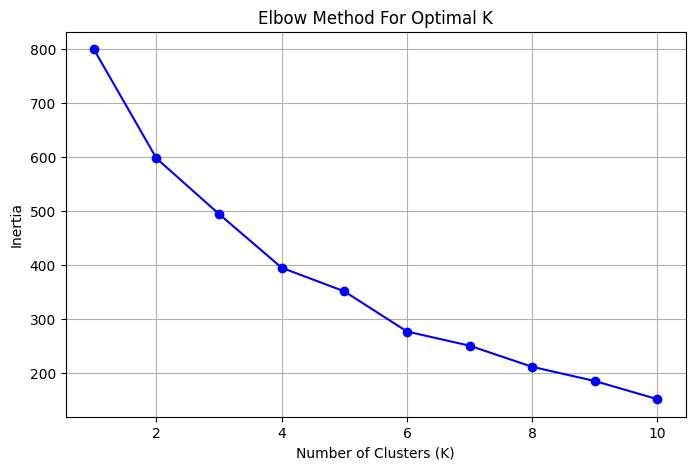

In [5]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()


#_Step 6: K-Means with Optimal K_

In [6]:
# Let's say optimal K = 5 from Elbow
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster label to data
df['Cluster'] = cluster_labels


#_Step 7: Visualize Clusters (PCA 2D Plot)_

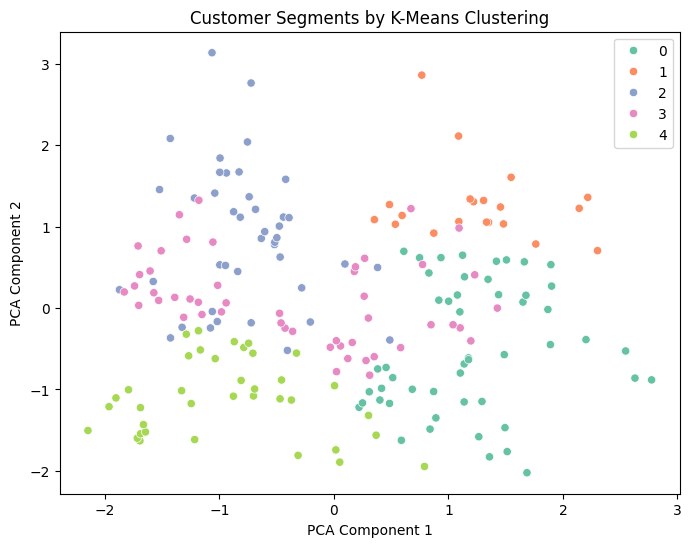

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=cluster_labels, palette='Set2')
plt.title('Customer Segments by K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


#_Step 8: Evaluate Using Silhouette Score_

In [8]:
score = silhouette_score(scaled_data, cluster_labels)
print("Silhouette Score:", round(score, 3))


Silhouette Score: 0.272
